### TAREA 2 cosmologia
Alejandro Gutierrez

20677580-7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import camb

## P4

Resolviendo ecuaciones perturvadas para materia

In [2]:
# Constantes
H0 = 67 # km/(s*Mpc)
omat = 0.3 # Omega_m,0
orad = 10**-4 # Omega_r,0
ode = 1 - omat - orad  

In [3]:
# funciones
def H(a):
    r = (orad*a**-4 + omat*a**-3 + ode*a**-3)
    return np.sqrt(r)*H0 

In [4]:
# arrays
k_arr = [H0, 5*H0, 20*H0, 200*H0]

In [5]:
def sistema(a, Y, k):
    d, o = Y  # Y = [d(a), o(a)] = [delta(a),theta(a)]
    denominador = (1 + 9*omat*H0**2/(2*a*k**2)) 
    dddx = ((9*omat*d*H0**2)/(2*(k*a)**2) - o/(H(a)*a**2))/denominador
    dodx = -o/a - 3*omat*d*H0**2 / (2*H(a)*a**3)
    return [dddx, dodx]

# Condiciones iniciales
d0 = 10**-5
o0 = 0

a_span = (10**-4, 1)
a_eval = np.linspace(10**-4, 1, 500)
for i in k_arr:
    sol = solve_ivp(sistema, a_span, [d0, o0], t_eval=a_eval, args=(i,))

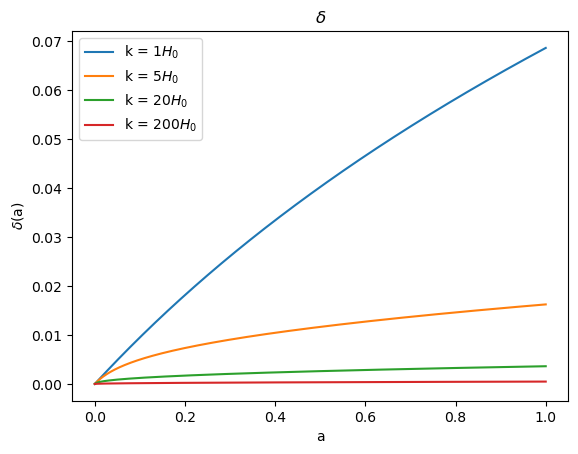

In [6]:
plt.xlabel("a")
plt.ylabel(r"$\delta$(a)")
plt.title(r"$\delta$")
for i in k_arr:
    sol = solve_ivp(sistema, a_span, [d0, o0], t_eval=a_eval, args=(i,))
    plt.plot(sol.t, sol.y[0], label=f'k = {int(i/H0)}$H_{0}$')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

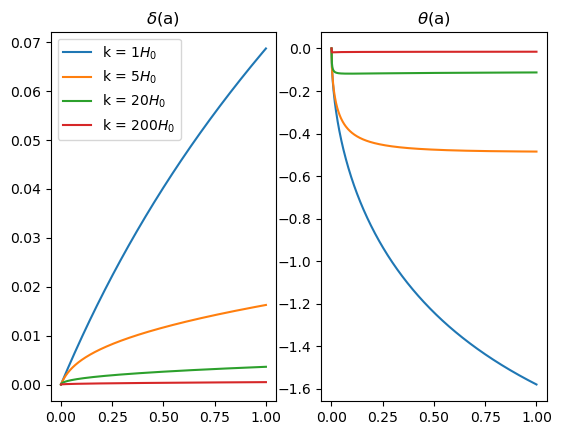

In [25]:
fig, ax = plt.subplots(1,2)
ax[0].set_title(r"$\delta$(a)")
ax[1].set_title(r"$\theta$(a)")
for i in k_arr:
    sol = solve_ivp(sistema, a_span, [d0, o0], t_eval=a_eval, args=(i,))
    ax[0].plot(sol.t, sol.y[0], label=f'k = {int(i/H0)}$H_{0}$')
    ax[1].plot(sol.t, sol.y[1], label=f'k = {int(i/H0)}$H_{0}$')
ax[0].legend()
#ax[1].legend()
plt.show

Se aprecia como las perturvaciones de materia solo crecen si el k es suficientemente pequeño,

es decir si son suficientemente grandes. Lo mismo ocurre con el campo de velocidades.

## P5

Matter Power Spectrum

In [35]:
H0 = 67 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
omk = 0 # omega k

In [36]:
# en set_cosmology se setea la masa de neutrinos =0
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk,mnu=0,num_massive_neutrinos=0)
#pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk)
pars.set_dark_energy(w=-1);

Se usan 2 metodos, solo para comparar

In [37]:
zmax = 250
zmin = 0

redshifts = np.arange(zmin,zmax,zmax//5)

pars.set_matter_power(redshifts=redshifts,kmax=1)

results = camb.get_results(pars)

kh,z,pk = results.get_linear_matter_power_spectrum(hubble_units=True,k_hunit=True)

Note: redshifts have been re-sorted (earliest first)


Text(0.5, 1.0, '$H_0$: 67.0 $\\frac{km/s}{Mpc}, $ $w$: -1.0, $c_s^2$: 1.0')

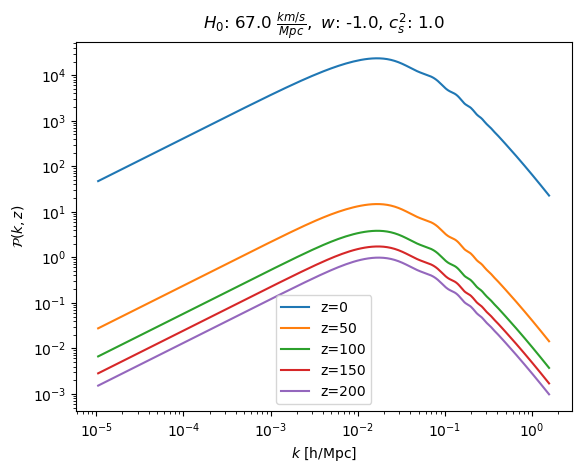

In [38]:
for iz, redshifts in enumerate(redshifts):
    plt.loglog(kh,pk[iz,:], label=f"z={redshifts}")
plt.legend()
plt.ylabel(r"$\mathcal{P}(k, z)$")
plt.xlabel(r"$k$ [h/Mpc]")
plt.title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f" $w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")

In [39]:
zmax = 250
zmin = 0

redshifts = np.arange(zmin,zmax,zmax//5)
pars.NonLinear = camb.model.NonLinear_pk
pars.set_matter_power(redshifts=redshifts,kmax=1)
results = camb.get_results(pars)
kh_nl,z_nl,pk_nl = results.get_matter_power_spectrum(minkh=1e-4)

Note: redshifts have been re-sorted (earliest first)


Text(0.5, 1.0, '$H_0$: 67.0 $\\frac{km/s}{Mpc}, $ $w$: -1.0, $c_s^2$: 1.0')

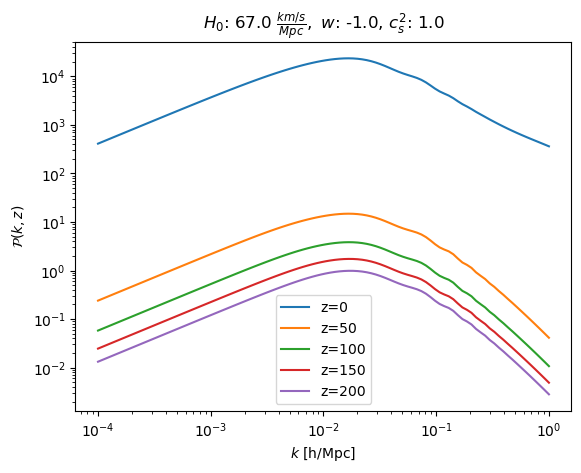

In [40]:
for iz, redshifts in enumerate(redshifts):
    plt.loglog(kh_nl,pk_nl[iz,:], label=f"z={redshifts}")
plt.legend()
plt.ylabel(r"$\mathcal{P}(k, z)$")
plt.xlabel(r"$k$ [h/Mpc]")
plt.title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f" $w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")

Efectos no lineales

In [41]:
redshifts = [10, 5, 1, 0]
# set non-linear Matter Power Spectrum
pars.NonLinear = camb.model.NonLinear_pk
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh_nl, z_nl, PK_nl = results.get_matter_power_spectrum(minkh=1e-4)

# kh_nl, z_nl, PK_nl = results.get_linear_matter_power_spectrum(hubble_units=True,
#                                                               k_hunit=True
#                                                               nonlinear=True)

# set linear Matter Power Spectrum
pars.NonLinear = camb.model.NonLinear_none
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh, z, PK = results.get_matter_power_spectrum(minkh=1e-4)

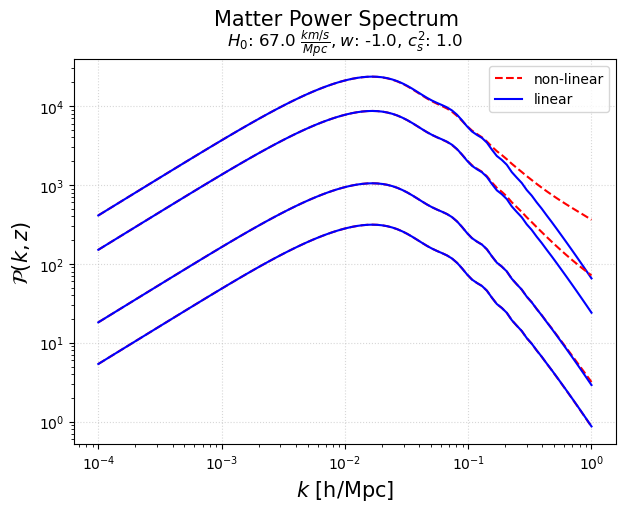

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), sharey=True)

for iz, redshift in enumerate(redshifts):
    ax.loglog(kh_nl, PK_nl[iz, :], color='r', ls='--')
    ax.loglog(kh, PK[iz, :], color='b')


ax.legend(['non-linear', 'linear'], loc='upper right')
ax.set_ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
ax.set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax.set_title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f"$w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")
ax.grid(alpha=0.5, ls=':')
fig.suptitle("Matter Power Spectrum", fontsize=15)

plt.show()

Primero recordar que el Matter Power Spectrum es una medida de la varianza de las perturbaciones de materia (galaxias hoy en día), es decir cómo es la densidad local con respecto a la media, es decir en la escala de su máximo es donde se esperaría ver mayor formación de estructuras. Además, notar que a k más grande es una escala más pequeña y k chico una escala más grande.

Con esto vemos que a mayor redshift lo que ocurre es que las diferencias van decreciendo en tamaño, pero no cambia de forma la función, es decir su relación con la escala. Esto es simplemente que en el pasado las diferencias de materia eran menores y el universo más uniforme.

Notamos que la teoría lineal funciona bien a grandes escalas (k chico), pues se describe bien cómo funciona el colapso gravitacional, pero a escalas pequeñas empieza a diferir, pues el colapso pasa a ser no lineal.

El peak de este espectro esta relacionado con el tamaño del horizonte causal al momento de igualdad radiación-materia. Aquí es donde dejó de dominar la radiación y la materia pudo empezar a colapsar más, siempre que se encontrara dentro del horizonte y no se “congelara”, además si se corre el código sin considerar los neutrinos con masa nula, el peak crece en un factor ~100, es decir su masa si influye en como colapsa la materia.

Cerca del peak, a escalas un poco más pequeñas, se ven unas pequeñas oscilaciones, que corresponden a las variaciones acústicas barionicas (BAO), donde la metería a la ves que se comprime se calienta, provocando una presión que la vuelve a repeler y así para generar oscilaciones.

A k aún más grandes vemos que las densidades son menores, donde además del efecto de la presión de radiación ya descrito en las BAO, se tiene el “Diffusion Damping”, donde los fotones viajan de regiones calientes a frías, igualando la temperatura del universo y reduciendo las variaciones.

Por otro lado, a k más pequeño corresponde a escalas más allá del horizonte causal, donde las perturbaciones se congelan y les cuesta más crecer.

## P6

Angular Power Spectrum

In [43]:
H0 = 67 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
omk = 0 # omega k

pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk,mnu=0,num_massive_neutrinos=0)
pars.set_dark_energy(w=-1);

results = camb.get_results(pars)

In [44]:
powers = results.get_cmb_power_spectra(pars,CMB_unit='muK')
#for i in powers: print(i)

In [45]:
unlesed = powers['unlensed_scalar']
ells = np.arange(unlesed[:,0].shape[0])

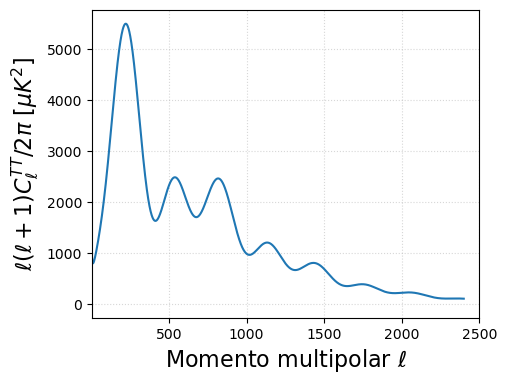

In [53]:
plt.figure(figsize=(5, 4))
plt.plot(ells, unlesed[:, 0])  # 0: TT, 1: EE, 2: BB, 3: TE
plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()

### Probemos distintos parametros

#### H0

In [59]:
H0 = 67 # km/s/Mpc
H02 = 50 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
omk = 0 # omega k

pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk)
pars.set_dark_energy(w=-1);
pars2 = camb.CAMBparams()
pars2.set_cosmology(H0=H02, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk)
pars2.set_dark_energy(w=-1);

results = camb.get_results(pars)
results2 = camb.get_results(pars2)

powers = results.get_cmb_power_spectra(pars,CMB_unit='muK')
powers2 = results.get_cmb_power_spectra(pars2,CMB_unit='muK')

unlesed = powers['unlensed_scalar']
ells = np.arange(unlesed[:,0].shape[0])
unlesed2 = powers2['unlensed_scalar']
ells2 = np.arange(unlesed2[:,0].shape[0])

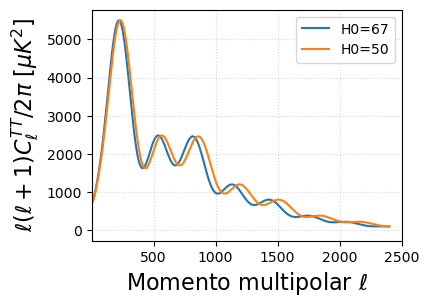

In [60]:
plt.figure(figsize=(4, 3))
plt.plot(ells, unlesed[:, 0],label=f"H0={H0}")  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(ells2, unlesed2[:, 0],label=f"H0={H02}")
plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)
plt.legend()

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()

El aumento de la constante de Hubble desplaza el power spectrum hacia la izquierda (Grandes escalas)

#### Curvatura (ralacionado con DE)

In [72]:
H0 = 67 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
omk = 0 # omega k
omk2 = 0.1

pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk)
pars.set_dark_energy(w=-1);
pars2 = camb.CAMBparams()
pars2.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk2)
pars2.set_dark_energy(w=-1);

results = camb.get_results(pars)
results2 = camb.get_results(pars2)

powers = results.get_cmb_power_spectra(pars,CMB_unit='muK')
powers2 = results2.get_cmb_power_spectra(pars2,CMB_unit='muK')

unlesed = powers['unlensed_scalar']
ells = np.arange(unlesed[:,0].shape[0])
unlesed2 = powers2['unlensed_scalar']
ells2 = np.arange(unlesed2[:,0].shape[0])

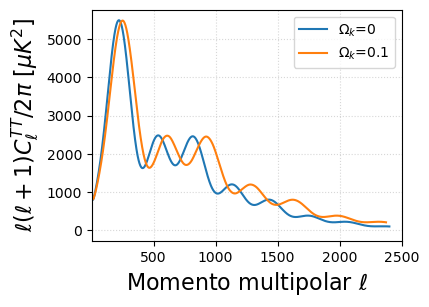

In [73]:
plt.figure(figsize=(4, 3))
plt.plot(ells, unlesed[:, 0],label=r"$\Omega_{k}$"f"={omk}")  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(ells2, unlesed2[:, 0],label=r"$\Omega_{k}$"f"={omk2}")
plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)
plt.legend()

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()

El aumento de la curvatura $\Omega_{k}$, desplaza el power spectrum hacia la derecha (Pequeñas escalas)

#### Bariones

In [92]:
H0 = 67 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
omega_bh22 = 0.0224*2 # Densidad fisica bariones
omega_bh23 = 0.0224*4
tau = 0.054 # optical depth
omk = 0 # omega k

pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk)
pars.set_dark_energy(w=-1);
pars2 = camb.CAMBparams()
pars2.set_cosmology(H0=H0, ombh2=omega_bh22, omch2=omega_ch2, tau=tau,omk=omk)
pars2.set_dark_energy(w=-1);
pars3 = camb.CAMBparams()
pars3.set_cosmology(H0=H0, ombh2=omega_bh23, omch2=omega_ch2, tau=tau,omk=omk)
pars3.set_dark_energy(w=-1);

results = camb.get_results(pars)
results2 = camb.get_results(pars2)
results3 = camb.get_results(pars3)

powers = results.get_cmb_power_spectra(pars,CMB_unit='muK')
powers2 = results2.get_cmb_power_spectra(pars2,CMB_unit='muK')
powers3 = results3.get_cmb_power_spectra(pars3,CMB_unit='muK')

unlesed = powers['unlensed_scalar']
ells = np.arange(unlesed[:,0].shape[0])
unlesed2 = powers2['unlensed_scalar']
ells2 = np.arange(unlesed2[:,0].shape[0])
unlesed3 = powers3['unlensed_scalar']
ells3 = np.arange(unlesed2[:,0].shape[0])

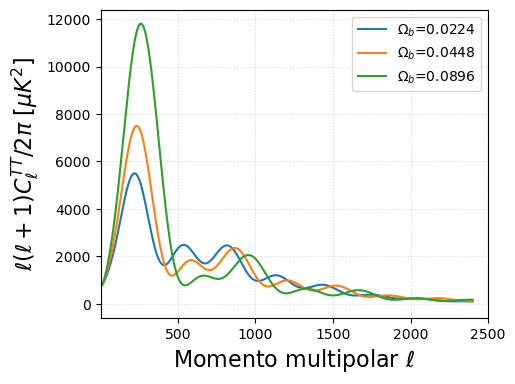

In [94]:
plt.figure(figsize=(5, 4))
plt.plot(ells, unlesed[:, 0],label=r"$\Omega_{b}$"f"={omega_bh2}")  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(ells2, unlesed2[:, 0],label=r"$\Omega_{b}$"f"={omega_bh22}")
plt.plot(ells3, unlesed3[:, 0],label=r"$\Omega_{b}$"f"={omega_bh23}")
plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)
plt.legend()

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()

El aumento de bariones provoca que le mayor peak aumente, pero el segundo disminuya. El resto de máximos se van alternando en que tanto se suprimen con respecto a los que tienen a sus lados. Se aprecian más oscilaciones a pequeñas escalas. Tambien se desplaza ligeramente a pequeñas escalas.

#### Col Dark Matter (CDM)

In [76]:
H0 = 67 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_ch22 = 0.120*2 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
omk = 0 # omega k

pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk)
pars.set_dark_energy(w=-1);
pars2 = camb.CAMBparams()
pars2.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch22, tau=tau,omk=omk)
pars2.set_dark_energy(w=-1);

results = camb.get_results(pars)
results2 = camb.get_results(pars2)

powers = results.get_cmb_power_spectra(pars,CMB_unit='muK')
powers2 = results2.get_cmb_power_spectra(pars2,CMB_unit='muK')

unlesed = powers['unlensed_scalar']
ells = np.arange(unlesed[:,0].shape[0])
unlesed2 = powers2['unlensed_scalar']
ells2 = np.arange(unlesed2[:,0].shape[0])

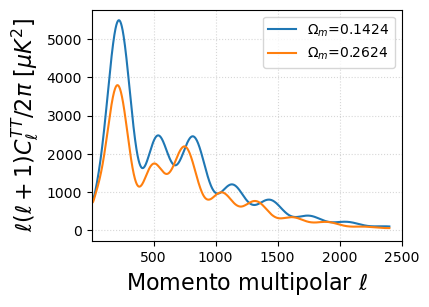

In [83]:
plt.figure(figsize=(4, 3))
plt.plot(ells, unlesed[:, 0],label=r"$\Omega_{m}$"f"={omega_ch2+omega_bh2}")  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(ells2, unlesed2[:, 0],label=r"$\Omega_{m}$"f"={round(omega_ch22+omega_bh2,4)}")
plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)
plt.legend()

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()

El aumento de la materia total (en particular solo CDM), provoca la disminución del power spectrum y los desplaza ligeramente hacia las grandes escalas 

#### Profundidad óptica

In [88]:
H0 = 67 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
tau2 = 0.054*2 # optical depth
omk = 0 # omega k

pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk)
pars.set_dark_energy(w=-1);
pars2 = camb.CAMBparams()
pars2.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau2,omk=omk)
#pars2.set_dark_energy(w=-1);

results = camb.get_results(pars)
results2 = camb.get_results(pars2)

powers = results.get_cmb_power_spectra(pars,CMB_unit='muK')
powers2 = results2.get_cmb_power_spectra(pars2,CMB_unit='muK')

unlesed = powers['unlensed_scalar']
ells = np.arange(unlesed[:,0].shape[0])
unlesed2 = powers2['unlensed_scalar']
ells2 = np.arange(unlesed2[:,0].shape[0])

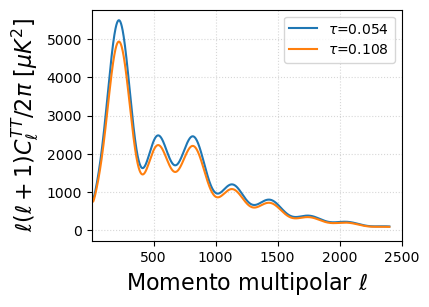

In [91]:
plt.figure(figsize=(4, 3))
plt.plot(ells, unlesed[:, 0],label=r"$\tau}$"f"={tau}")  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(ells2, unlesed2[:, 0],label=r"$\tau$"f"={tau2}")
plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)
plt.legend()

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()

El aumento de la profundidad óptica, provoca la disminución del power spectrum 

### Análisis

Primeramente, recordamos que el angular power spectrum es como son las variaciones de las fluctuaciones de temperatura en correlación a los distintos puntos de la esfera celeste. Relaciona estas fluctuaciones según los distintos tamaños angulares comparados.

Aquí se pueden visualizar los BAO, donde el peak más grande representa la máxima compresión (max fluctuación de temperatura), que es justo en el horizonte de sonido, donde las perturbaciones pueden empezar a colapsar.

Así notamos que el aumento de $H_{0}$ (aumento es la velocidad de expansión del universo), provoca que los peaks se desplacen hacia la grandes escalas. Esto pues al expandirse más rápido el tiempo de comunicación del sonido aumenta, provocando que este horizonte de sonido sea más pequeño y los BAO más lentos, haciendo que crezcan más y desplazándolos a l menores.

La disminución de la curvatura o equivalentemente el aumento de la energía oscura, considerando la densidad de materia sin variar, provoca que se desplace hacia las grandes escalas. Esto es análogo al aumento de $H_{0}$, pues al haber más energía oscura, el universo se expande más rápido. Lo que nos llega a concluir que la geometría de universo también afecta en como este se expande y se comunica la presión de los fluidos.

El aumento de los bariones, $\Omega_{b}$, provoca la crecida del primer peak y la disminución del segundo, en efecto si nos fijamos bien de hecho provoca que los peaks pares se supriman con respecto a los impares. Además, que a pequeñas escalas se aprecian más oscilaciones.

La crecida del primer peak se puede entender porque al haber más materia la compresión es más fuerte alcanzando una mayor variación en temperatura.  Al haber más materia también se puede entender que a pequeñas escalas se aprecien más oscilaciones que antes no eran suficientemente notorias. El hecho que los peaks pares disminuyan es bastante extraño, pero es posible que se deba a que el resto de peaks adhieran más materia restándole a sus vecinos.

En su contraparte, el aumento de CDM produce la disminución y corrimiento a grandes escalas del power spectrum, esto se explica porque al haber CDM los potenciales son notoriamente más profundos y los fotones al salir pierden más energía, disminuyendo la temperatura observada. Por otro lado, también se esperaría que se redujera la velocidad del sonido, reduciendo el horizonte del sonido y permitiendo a las oscilaciones crecer más.

Por último, el aumento de la profundidad optima disminuye el power spectrum, pues al ser menos “transparente” el universo, las variaciones se ven atenuadas. 